In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv("MANAS_TRAIN.csv")
test=pd.read_csv("MANAS_TEST.csv")

In [4]:
train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


#### First let's try doing with a single feature, say Overall Quality

In [5]:
x_single=train["OverallQual"]
y_single=train["SalePrice"]

The Line of best fit will have the form: mx+b <br>
and we need to minimise the mse Loss : (Y<sub>real</sub>-Y<sub>pred</sub>)<sup>2</sup> / n <br>
Using Partial Differentiation to minimise the loss, the value of m(slope) that we get is: <br>
n*sum(x*y) + sum(x*y)*sum(x) / (n*sum(x^2) - sum(x)^2)<br>
where n is the number of samples


In [6]:
n=len(x_single)
m=(n*(sum(x_single*y_single))-sum(x_single)*sum(y_single))/(n*sum(x_single**2)-sum(x_single)**2)
c=(sum(y_single)*sum(x_single**2)-sum(x_single)*sum(x_single*y_single))/(n*sum(x_single**2)-sum(x_single)**2)

In [7]:
def line_of_best_fit_using_single_feature(x):
    return m*x+c

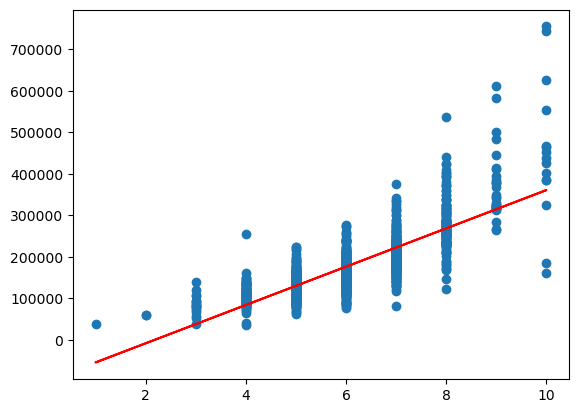

In [8]:
plt.scatter(x_single,y_single)# The graph is little weird given that we have taken only a single feature
plt.plot(x_single,line_of_best_fit_using_single_feature(x_single),color="red")

## Pretty Good, But in the Actual Scenario, the price depends on multiple variables, so let's see how we can handle that

#### First Technique: Using the direct Mathematical Formula, and one trick that I have come across in literature is that Bias term is handled by introducing a columns of 1s in the training data

In [9]:
train.insert(0,"Bias",np.ones(len(train)))# A column of ones has been inserted

In [10]:
train.head()

,Bias,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,1.0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,1.0,7,1646,1,240,918,918,2,7,1941,1950,164000
2,1.0,5,1316,2,484,926,926,1,6,1929,2001,130000
3,1.0,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,1.0,7,1253,2,402,1237,1253,2,6,1995,1996,176000


## And just to be sure, let's have a look if the data type of all the features is consistent

In [11]:
train.info() # Well great, no objects or str of any kind

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bias          1168 non-null   float64
 1   OverallQual   1168 non-null   int64  
 2   GrLivArea     1168 non-null   int64  
 3   GarageCars    1168 non-null   int64  
 4   GarageArea    1168 non-null   int64  
 5   TotalBsmtSF   1168 non-null   int64  
 6   1stFlrSF      1168 non-null   int64  
 7   FullBath      1168 non-null   int64  
 8   TotRmsAbvGrd  1168 non-null   int64  
 9   YearBuilt     1168 non-null   int64  
 10  YearRemodAdd  1168 non-null   int64  
 11  SalePrice     1168 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 109.6 KB


In [122]:
X_train=train.drop("SalePrice",axis=1)
Y_train=train["SalePrice"]

In [13]:
#Similarily Let's Prepare Testing Data
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000


In [14]:
test.insert(0,"Bias",np.ones(len(test)))
X_test=test.drop("SalePrice",axis=1)
Y_test=test["SalePrice"]

In [15]:
weights=np.linalg.inv((X_train.T@X_train)).dot((X_train.T@Y_train)) #Pre-derived Mathematical Formula

In [16]:
weights.shape #makes sense, 11 coefficients to handle 11 features(including bias)

(11,)

### Testing training and testing Accuracy
#### But the thing is that since Linear Regression gives approximations i.e. it predicts values close to the original value, we can't measure accuracy, there's something called R<sup>2</sup> Score for Linear Regression.
#### So R<sup>2</sup> Score basically measures how close  the predicted values are to the Actual Values  

In [17]:
def R2_Score(y_pred,y_true):
    true_variance=sum((y_true-y_true.mean())**2)
    pred_variance=sum((y_true-y_pred)**2)
    return 1-(pred_variance/true_variance)
#Training Accuracy
print("Training Accuracy/R2_Score:",R2_Score(X_train@weights,Y_train))

#Testing Accuracy
print("Testing Accuracy/R2Score:",R2_Score(X_test@weights,Y_test))
# Trust me, never in my life have I seen the test accuracy higher than train accuracy

Training Accuracy/R2_Score: 0.7618968883576632
Testing Accuracy/R2Score: 0.8218751679817853


### Okay before we move on to the next approach(gradient descent), I'd like to see what happens when the Bias term is initialized as Zero 

In [18]:
X_train["Bias"]=0.0
X_test["Bias"]=0.0

In [19]:
X_train.head()

,Bias,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.0,7,1820,1,240,1026,1133,2,8,1925,1950
1,0.0,7,1646,1,240,918,918,2,7,1941,1950
2,0.0,5,1316,2,484,926,926,1,6,1929,2001
3,0.0,10,2402,3,672,3094,2402,2,10,2008,2008
4,0.0,7,1253,2,402,1237,1253,2,6,1995,1996


In [20]:
weights_zero=np.linalg.inv((X_train.T@X_train)).dot((X_train.T@Y_train)) #Pre-derived Mathematical Formula

LinAlgError: Singular matrix

## Alright, so it should have been obvious 🤡 initializing the weights as zero makes the Resultant matrix singular whose inverse can't be calculated, but will zeros work in gradient descent, we'll see

# Gradient Descent

In [21]:
X_train["Bias"]=1.0
X_test["Bias"]=1.0

In [22]:
num_samples,num_features=X_train.shape  

In [23]:
weights=np.random.randn(num_features)

In [143]:
# Defining a simple linear regression class with gradient descent for training. 
class LinearRegression():
    def __init__(self,lr,X,Y,epochs):
        self.lr=lr
        self.X=X
        self.Y=Y
        self.num_samples,self.num_features=X.shape
        self.W=np.random.randn(num_features)
        self.epochs=epochs
    def _gradient_descent_step(self,predictions):
        error = predictions - self.Y
        #gradient = np.dot(self.X.T,  error) / self.num_samples
        gradient = np.dot(self.X.T, error)/self.num_samples
        self.W -= self.lr * gradient
    
    def fit(self):

        self._cost_history = []
        self._accuracy_history = []
        for i in range(self.epochs):

            prediction = self.X@self.W
            cost = self.Mean_Squared_Error(prediction)
            # Calculate accuracy
            accuracy = R2_Score(prediction,self.Y)
            self._accuracy_history.append(accuracy)

            self._cost_history.append(cost)
            # Print the training accuracy for each epoch
            print(f"Epoch {i + 1}/{self.epochs} - Training Accuracy: {accuracy:.4f}")

            self._gradient_descent_step(prediction)

        # Plot the cost after each epoch
        plt.plot(range(1, self.epochs + 1), self._cost_history, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title('Cost over Epochs')
        plt.show()


        return self
  
    def Mean_Squared_Error(self,pred):
        sq_error=(pred-self.Y)**2
        return 1.0/(2*self.num_samples)*sq_error.sum()

In [174]:
def Normalize(Data):
    Data_Norm=(Data-Data.mean())/Data.std()
    return Data_Norm
X_train_norm=Normalize(X_train)
X_train_norm["Bias"]=1.0
Y_train_norm=Normalize(Y_train)

In [175]:
Lin_Reg_train=LinearRegression(0.1,X_train_norm,Y_train_norm,500)
#Lin_Reg_train.Normalize()

Epoch 1/500 - Training Accuracy: -5.7676
Epoch 2/500 - Training Accuracy: -3.3235
Epoch 3/500 - Training Accuracy: -2.2836
Epoch 4/500 - Training Accuracy: -1.6707
Epoch 5/500 - Training Accuracy: -1.2379
Epoch 6/500 - Training Accuracy: -0.9095
Epoch 7/500 - Training Accuracy: -0.6535
Epoch 8/500 - Training Accuracy: -0.4511
Epoch 9/500 - Training Accuracy: -0.2896
Epoch 10/500 - Training Accuracy: -0.1596
Epoch 11/500 - Training Accuracy: -0.0539
Epoch 12/500 - Training Accuracy: 0.0329
Epoch 13/500 - Training Accuracy: 0.1048
Epoch 14/500 - Training Accuracy: 0.1651
Epoch 15/500 - Training Accuracy: 0.2162
Epoch 16/500 - Training Accuracy: 0.2599
Epoch 17/500 - Training Accuracy: 0.2977
Epoch 18/500 - Training Accuracy: 0.3306
Epoch 19/500 - Training Accuracy: 0.3597
Epoch 20/500 - Training Accuracy: 0.3856
Epoch 21/500 - Training Accuracy: 0.4088
Epoch 22/500 - Training Accuracy: 0.4297
Epoch 23/500 - Training Accuracy: 0.4487
Epoch 24/500 - Training Accuracy: 0.4661
Epoch 25/500 -

Epoch 212/500 - Training Accuracy: 0.7606
Epoch 213/500 - Training Accuracy: 0.7607
Epoch 214/500 - Training Accuracy: 0.7607
Epoch 215/500 - Training Accuracy: 0.7607
Epoch 216/500 - Training Accuracy: 0.7607
Epoch 217/500 - Training Accuracy: 0.7608
Epoch 218/500 - Training Accuracy: 0.7608
Epoch 219/500 - Training Accuracy: 0.7608
Epoch 220/500 - Training Accuracy: 0.7608
Epoch 221/500 - Training Accuracy: 0.7609
Epoch 222/500 - Training Accuracy: 0.7609
Epoch 223/500 - Training Accuracy: 0.7609
Epoch 224/500 - Training Accuracy: 0.7609
Epoch 225/500 - Training Accuracy: 0.7609
Epoch 226/500 - Training Accuracy: 0.7610
Epoch 227/500 - Training Accuracy: 0.7610
Epoch 228/500 - Training Accuracy: 0.7610
Epoch 229/500 - Training Accuracy: 0.7610
Epoch 230/500 - Training Accuracy: 0.7610
Epoch 231/500 - Training Accuracy: 0.7611
Epoch 232/500 - Training Accuracy: 0.7611
Epoch 233/500 - Training Accuracy: 0.7611
Epoch 234/500 - Training Accuracy: 0.7611
Epoch 235/500 - Training Accuracy:

Epoch 458/500 - Training Accuracy: 0.7619
Epoch 459/500 - Training Accuracy: 0.7619
Epoch 460/500 - Training Accuracy: 0.7619
Epoch 461/500 - Training Accuracy: 0.7619
Epoch 462/500 - Training Accuracy: 0.7619
Epoch 463/500 - Training Accuracy: 0.7619
Epoch 464/500 - Training Accuracy: 0.7619
Epoch 465/500 - Training Accuracy: 0.7619
Epoch 466/500 - Training Accuracy: 0.7619
Epoch 467/500 - Training Accuracy: 0.7619
Epoch 468/500 - Training Accuracy: 0.7619
Epoch 469/500 - Training Accuracy: 0.7619
Epoch 470/500 - Training Accuracy: 0.7619
Epoch 471/500 - Training Accuracy: 0.7619
Epoch 472/500 - Training Accuracy: 0.7619
Epoch 473/500 - Training Accuracy: 0.7619
Epoch 474/500 - Training Accuracy: 0.7619
Epoch 475/500 - Training Accuracy: 0.7619
Epoch 476/500 - Training Accuracy: 0.7619
Epoch 477/500 - Training Accuracy: 0.7619
Epoch 478/500 - Training Accuracy: 0.7619
Epoch 479/500 - Training Accuracy: 0.7619
Epoch 480/500 - Training Accuracy: 0.7619
Epoch 481/500 - Training Accuracy:

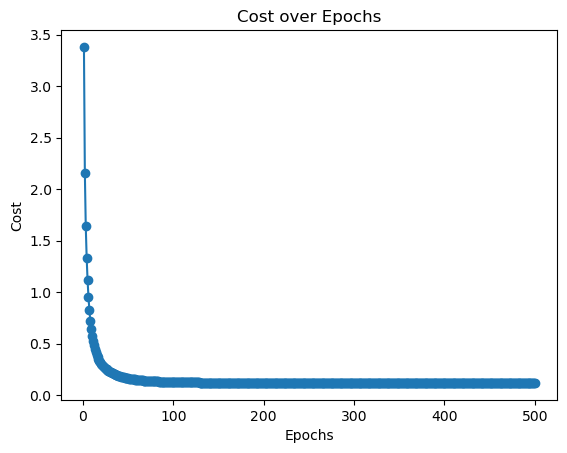

In [176]:
Lin_Reg_train.fit()

## Training Accuracy seems to have been saturated and nearly the same as we got with the mathematical formula

In [177]:
X_test.head()

,Bias,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,1.0,8,1970,3,753,1085,1120,2,8,2006,2006
1,1.0,6,1632,1,338,1240,1632,2,6,1958,1988
2,1.0,7,1223,2,480,600,520,2,4,2005,2005
3,1.0,5,1559,2,812,1559,1559,1,5,1948,1973
4,1.0,4,630,1,286,630,630,1,3,1970,2002


In [180]:
X_test_norm=Normalize(X_test)
X_test_norm["Bias"]=1.0
Y_test_norm=Normalize(Y_test)

In [182]:
R2_Score(X_test_norm@Lin_Reg_train.W,Y_test_norm)#Hmm... Again, same as the Mathematical Formula

0.8197388948366723

## Now all of this is very good, but if we ACTUALLY want to predict the price of a house, we would want the price, and not just the normalized output as we are getting here
#### Now Since the outputs were Normalized as: 
Y<sub>norm</sub> = (Y<sub>act</sub>-Y<sub>mean</sub>)/Y<sub>std</sub>
<br>Hence, the actual price can be given by: <br>
Y<sub>act</sub> = Y<sub>norm</sub> * Y<sub>std</sub> + Y<sub>mean</sub>

In [183]:
def Predict(X):
    train_mean=Y_train.mean()
    train_std=Y_train.std()
    Pred_norm=X@Lin_Reg_train.W
    return Pred_norm*train_std + train_mean

In [190]:
#Hmm... Seems Close Enough
pd.DataFrame({"Predictions":Predict(X_test_norm),"Actual Value":Y_test}) 

,Predictions,Actual Value
0,271323.371089,281000
1,181731.325758,139000
2,180766.344464,147400
3,180914.131692,153500
4,80325.446737,86000
...,...,...
287,186350.180187,158000
288,131848.693538,118000
289,157610.300024,140000
290,207274.236192,159895
